In [1]:
%matplotlib inline
import os, sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from os.path import join, isfile

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
#data_path = '/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/grid_search_FE_regular_with_id_xgb_models'
#data_path = '/home/ymm/kaggle/xgboost_hyperopt/scripts/xgb_model_features_0'
data_path = '/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/final_xgb_models/combined_xgb_models_038'

In [8]:
def collect_feature_names(data_path, fea_name='feature', thres_name = None, thres = 10):
    csv_files = [f for f in os.listdir(data_path) if '.csv' in f]
    feature_names = set()
    for file_name in csv_files:
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        if thres_name is None:
            feature_names = feature_names.union(data[fea_name])
        else:
            feature_names = feature_names.union(data.loc[data[thres_name] > thres, fea_name])
            
    return feature_names


def combine_feature_importance_files(data_path, fea_name='feature', thres_name = None, thres = 10):
    csv_files = [f for f in os.listdir(data_path) if '.csv' in f]
    fea_imp = None
    file_counter = -1
    score_columns = []
    norm_score_columns = []
    
    for file_name in csv_files:
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        
        if thres_name is not None:
            data = data.loc[data[thres_name] > thres]
            
        data = data.set_index(fea_name)
        print data.shape
        file_counter += 1
        data.columns = ['{}_{}'.format(column, file_counter) for column in data.columns]
        score_columns.append('{}_{}'.format('fscore', file_counter))
        norm_score_columns.append('{}_{}'.format('norm_fscore', file_counter))
        if fea_imp is None:
            fea_imp = data
        else:
            fea_imp = pd.merge(fea_imp, data, how='outer', left_index=True, right_index=True)
    
    fea_imp['fscore_sum'] = fea_imp[score_columns].sum(axis=1)
    fea_imp['norm_fscore_sum'] = fea_imp[norm_score_columns].sum(axis=1)
    return fea_imp



def combine_feature_score(data_path, fea_name='feature', score_name = None):
    csv_files = [f for f in os.listdir(data_path) if '.csv' in f]
    fea_score = None
    
    for i, file_name in enumerate(csv_files):
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        data = data.set_index([fea_name])
        col_name = '{}_{}'.format(score_name, i)
        
        if fea_score is None:
            fea_score = pd.DataFrame()
        
        fea_score[col_name] = data[score_name]

            #fea_score = pd.merge(fea_score, data, how='outer', left_index=True, right_index=True)
            
    return fea_score

In [9]:
#tmp = combine_feature_importance_files(data_path)
#combined_imp = combine_feature_importance_files(data_path, thres_name = 'fscore')
combined_imp = combine_feature_importance_files(data_path)

(1043, 2)
(528, 2)
(716, 2)
(400, 2)
(412, 2)
(856, 2)
(1174, 2)
(844, 2)
(510, 2)
(720, 2)
(1205, 2)
(1006, 2)


In [10]:
print combined_imp.shape
combined_imp.tail()

(1441, 26)


,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,...,fscore_8,norm_fscore_8,fscore_9,norm_fscore_9,fscore_10,norm_fscore_10,fscore_11,norm_fscore_11,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,,,,,,,,,,
time_ratio_value,25.0,0.002437,15.0,0.003688,3.0,0.000532,2.0,0.000586,7.0,0.002033,...,2.0,0.000494,6.0,0.001071,46.0,0.002819,15.0,0.001460,174.0,0.020425
time_ratio_value_index,12.0,0.001170,NaN,NaN,17.0,0.003014,NaN,NaN,2.0,0.000581,...,1.0,0.000247,6.0,0.001071,40.0,0.002451,25.0,0.002433,165.0,0.016983
time_ratio_value_index_diff_0,53.0,0.005166,3.0,0.000738,14.0,0.002482,NaN,NaN,1.0,0.000290,...,3.0,0.000741,6.0,0.001071,52.0,0.003187,14.0,0.001363,215.0,0.020881
time_ratio_value_index_diff_1,14.0,0.001365,1.0,0.000246,3.0,0.000532,1.0,0.000293,3.0,0.000871,...,4.0,0.000989,6.0,0.001071,25.0,0.001532,7.0,0.000681,98.0,0.010728
time_sum,23.0,0.002242,13.0,0.003196,16.0,0.002836,3.0,0.000879,11.0,0.003195,...,17.0,0.004202,20.0,0.003571,42.0,0.002574,51.0,0.004964,266.0,0.034752


In [11]:
print combined_imp.shape
combined_imp.head()

(1441, 26)


,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,...,fscore_8,norm_fscore_8,fscore_9,norm_fscore_9,fscore_10,norm_fscore_10,fscore_11,norm_fscore_11,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,,,,,,,,,,
L0_S0_F0,25.0,0.002437,1.0,0.000246,1.0,0.000177,2.0,0.000586,2.0,0.000581,...,NaN,NaN,8.0,0.001428,13.0,0.000797,8.0,0.000779,72.0,0.008004
L0_S0_F10,1.0,0.000097,1.0,0.000246,NaN,NaN,1.0,0.000293,NaN,NaN,...,NaN,NaN,4.0,0.000714,12.0,0.000735,8.0,0.000779,36.0,0.003575
L0_S0_F12,3.0,0.000292,1.0,0.000246,NaN,NaN,1.0,0.000293,NaN,NaN,...,8.0,0.001977,1.0,0.000179,3.0,0.000184,5.0,0.000487,34.0,0.004718
L0_S0_F14,5.0,0.000487,NaN,NaN,4.0,0.000709,2.0,0.000586,NaN,NaN,...,1.0,0.000247,NaN,NaN,14.0,0.000858,2.0,0.000195,45.0,0.004358
L0_S0_F16,4.0,0.000390,NaN,NaN,3.0,0.000532,2.0,0.000586,NaN,NaN,...,5.0,0.001236,6.0,0.001071,20.0,0.001226,15.0,0.001460,97.0,0.009615


In [12]:
## sort by the norm_fscore_sum
sorted_combined_imp = combined_imp.sort_values(by=['norm_fscore_sum'], ascending=False)

In [13]:
sorted_combined_imp.head(20)

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,...,fscore_8,norm_fscore_8,fscore_9,norm_fscore_9,fscore_10,norm_fscore_10,fscore_11,norm_fscore_11,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,,,,,,,,,,
first_time_value_index_diff_1,302.0,0.029435,235.0,0.057782,272.0,0.048218,262.0,0.076743,208.0,0.060412,...,218.0,0.053880,258.0,0.046063,292.0,0.017895,261.0,0.025404,3216.0,0.515775
L3_S30_F3704,57.0,0.005556,153.0,0.037620,169.0,0.029959,103.0,0.030170,156.0,0.045309,...,99.0,0.024469,135.0,0.024103,224.0,0.013728,217.0,0.021121,1687.0,0.278756
L3_S32_F3854,71.0,0.006920,154.0,0.037866,187.0,0.033150,98.0,0.028705,112.0,0.032530,...,107.0,0.026446,50.0,0.008927,148.0,0.009070,177.0,0.017228,1442.0,0.238852
L1_S24_F1723,129.0,0.012573,85.0,0.020900,126.0,0.022336,94.0,0.027534,132.0,0.038339,...,147.0,0.036332,81.0,0.014462,144.0,0.008825,97.0,0.009441,1350.0,0.229218
dat_L3_S33_mean,102.0,0.009942,93.0,0.022867,79.0,0.014005,139.0,0.040715,86.0,0.024978,...,97.0,0.023974,144.0,0.025710,145.0,0.008886,120.0,0.011680,1385.0,0.226580
cat_max,134.0,0.013060,90.0,0.022129,84.0,0.014891,126.0,0.036907,79.0,0.022945,...,86.0,0.021256,98.0,0.017497,100.0,0.006129,113.0,0.010999,1362.0,0.215395
L3_S29_F3351,133.0,0.012963,77.0,0.018933,91.0,0.016132,108.0,0.031634,121.0,0.035144,...,109.0,0.026940,102.0,0.018211,99.0,0.006067,72.0,0.007008,1272.0,0.210721
num_L3_S33_mean_index_diff_1,117.0,0.011404,84.0,0.020654,104.0,0.018436,79.0,0.023140,79.0,0.022945,...,75.0,0.018537,107.0,0.019104,149.0,0.009132,135.0,0.013140,1308.0,0.198378
L1_S24_F1846,88.0,0.008577,77.0,0.018933,88.0,0.015600,90.0,0.026362,53.0,0.015394,...,102.0,0.025210,62.0,0.011069,115.0,0.007048,108.0,0.010512,1093.0,0.173395


In [23]:
nan_boolean_index = sorted_combined_imp.isnull().sum(axis=1) == 0

In [25]:
nan_removed_df = sorted_combined_imp[nan_boolean_index]

In [27]:
print nan_removed_df.shape
nan_removed_df.tail()

(160, 26)


,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,...,fscore_8,norm_fscore_8,fscore_9,norm_fscore_9,fscore_10,norm_fscore_10,fscore_11,norm_fscore_11,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,,,,,,,,,,
L1_S24_F1578,8.0,0.000780,1.0,0.000246,3.0,0.000532,1.0,0.000293,6.0,0.001743,...,1.0,0.000247,3.0,0.000536,8.0,0.000490,7.0,0.000681,63.0,0.007645
L3_S30_F3564,10.0,0.000975,4.0,0.000984,1.0,0.000177,1.0,0.000293,1.0,0.000290,...,2.0,0.000494,3.0,0.000536,11.0,0.000674,6.0,0.000584,64.0,0.007531
dat_nan_count,6.0,0.000585,2.0,0.000492,4.0,0.000709,2.0,0.000586,2.0,0.000581,...,5.0,0.001236,1.0,0.000179,7.0,0.000429,4.0,0.000389,44.0,0.006186
dat_L0_S13_mean,4.0,0.000390,1.0,0.000246,4.0,0.000709,2.0,0.000586,1.0,0.000290,...,1.0,0.000247,2.0,0.000357,4.0,0.000245,4.0,0.000389,43.0,0.005932
time_diff_end_col,2.0,0.000195,2.0,0.000492,6.0,0.001064,2.0,0.000586,1.0,0.000290,...,2.0,0.000494,1.0,0.000179,2.0,0.000123,4.0,0.000389,32.0,0.004837


In [14]:
sorted_combined_imp.tail(20)

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,...,fscore_8,norm_fscore_8,fscore_9,norm_fscore_9,fscore_10,norm_fscore_10,fscore_11,norm_fscore_11,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,,,,,,,,,,
dat_L3_S45_mean_index_diff_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000061,NaN,NaN,1.0,0.000061
num_L0_S21_var_index_diff_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000061,NaN,NaN,1.0,0.000061
L3_S50_D4244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000061,NaN,NaN,1.0,0.000061
L0_S22_F581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000061,NaN,NaN,1.0,0.000061
num_L0_S16_var_index_diff_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000061,NaN,NaN,1.0,0.000061
dat_L3_S47_var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000061,NaN,NaN,1.0,0.000061
num_L3_S43_mean_index_diff_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000061,NaN,NaN,1.0,0.000061
num_L3_S44_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000061,NaN,NaN,1.0,0.000061
dat_L3_S48_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000061,NaN,NaN,1.0,0.000061


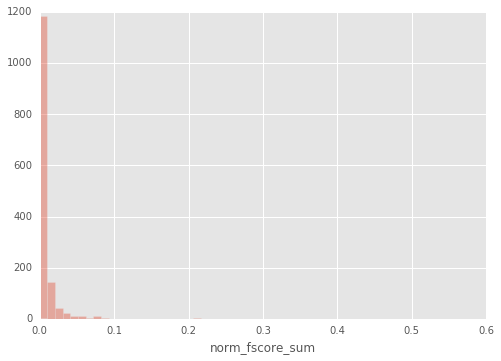

In [15]:
sns.distplot(sorted_combined_imp['norm_fscore_sum'], bins=50, kde=False)

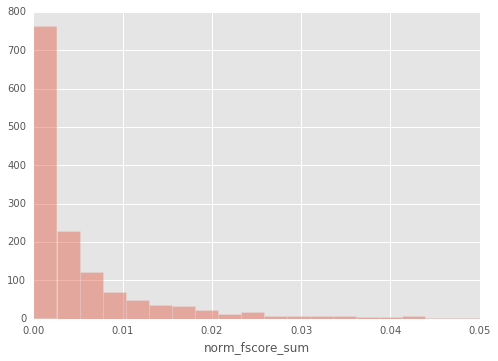

In [16]:
plt.xlim(0, 0.05)
sns.distplot(sorted_combined_imp['norm_fscore_sum'], bins=200, kde=False)

In [17]:
sorted_combined_imp.shape

(1441, 26)

In [18]:
sum(sorted_combined_imp['norm_fscore_sum'] >= 0.005)

464

In [ ]:
sorted_combined_imp.head()

In [ ]:
missing_row_counts = sorted_combined_imp.isnull().sum(axis=1)

In [ ]:
sum(missing_row_counts > 0)

In [ ]:
sorted_combined_imp.tail(200)

In [ ]:
plt.hist(combined_imp['norm_fscore_sum'], bins=50)

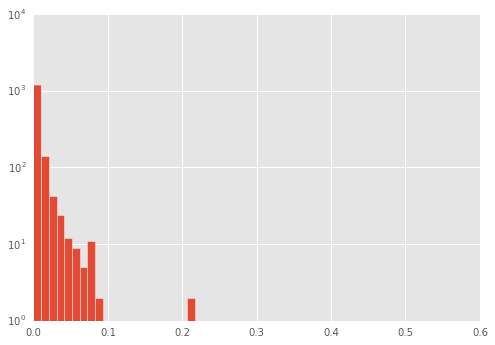

In [19]:
plt.hist(combined_imp['norm_fscore_sum'], bins=50)
plt.gca().set_yscale("log")

In [ ]:
sorted_combined_imp.to_csv('~/full_data_xgb_feature_importance.csv')

In [ ]:
top_variable = combined_imp.sort('fscore_sum')[-300:].index

In [ ]:
for col in top_variable:
    if col in train_cat_cols.columns:
        print col

In [ ]:
raw_data_path = '/home/ymm/bosch/'

train_num_file   = 'train_numeric.csv'
train_cat_file   = 'train_categorical.csv'
train_date_file  = 'train_date.csv'
test_num_file    = 'test_numeric.csv'
test_cat_file    = 'test_categorical.csv'
test_date_file   = 'test_date.csv'
sample_submission_file   = 'sample_submission.csv'

start_time_column_name = 'L0_S0_D1'
id_column_name = 'Id'
dep_var_name = 'Response'

train_cat_cols = pd.read_csv(join(raw_data_path, train_cat_file), index_col=id_column_name, nrows=0)
train_date_cols = pd.read_csv(join(raw_data_path, train_date_file), index_col=id_column_name, nrows=0)
train_num_cols = pd.read_csv(join(raw_data_path, train_num_file), index_col=id_column_name, nrows=0)

In [ ]:
## important column disribution
print sum(train_num_cols.columns.isin(combined_imp.index)), sum(train_cat_cols.columns.isin(combined_imp.index)), sum(train_date_cols.columns.isin(combined_imp.index))

In [ ]:
selected_cat_col_names = train_cat_cols.columns[train_cat_cols.columns.isin(combined_imp.index)]

In [ ]:
selected_combined_imp = combined_imp.ix[selected_cat_col_names]

In [ ]:
print selected_combined_imp.shape
selected_combined_imp.head()

In [ ]:
bin_NaN_data_path = '/home/ymm/kaggle/bosch/data_2_bins_xgb_combined_models/data_bin_NaN_models'
combined_nan_imp = combine_feature_importance_files(bin_NaN_data_path, thres_name = 'fscore')

In [ ]:
common_col_names = set(combined_nan_imp.index).intersection(set(combined_imp.index))

In [ ]:
print len(combined_imp.index), len(common_col_names), len(combined_nan_imp)

In [ ]:
combined_nan_imp.ix[common_col_names]

In [ ]:
combined_nan_imp.head()

### Analysis on single feature importance file

In [ ]:
data_files =  [f for f in os.listdir(data_path) if '.csv' in f]
data = pd.read_csv(join(data_path, data_files[0]), index_col=0)
tmp = data.loc[data['fscore']>10 ,'feature']

In [ ]:
print data.shape
data.tail(10)

In [ ]:
plt.hist(data['fscore'], bins=50)
plt.gca().set_yscale("log")

In [ ]:
print data.shape
data.head()

In [ ]:
tmp = data.feature.apply(lambda x: x.split('_')[2][0])

In [ ]:
tmp.value_counts()

In [ ]:
plt.hist(data['norm_fscore'], bins=50)
plt.gca().set_yscale("log")

In [ ]:
data_files =  [f for f in os.listdir(data_path) if '.csv' in f]
data = pd.read_csv(join(data_path, data_files[0]), index_col=0)
tmp = data.loc[data['fscore']>10 ,'feature']

In [ ]:
data.tail(20)

In [ ]:
len(full_union)